# Missing values

Missing data is the absence of values in certain observations of a variable. Missing data is an unavoidable problem in most data sources and may have a significant impact on the conclusions that we derived from the data.

`Why is the data missing?`

The source of missing data can vary. These are just some examples:

* The value was forgotten, lost, or not stored properly.

* The value does not exist.

* The value can't be known or identified.

To give real-life examples, a person may choose not to complete all fields in a form if they are not mandatory. That would introduce missing data. Sometimes people do not want to disclose some information, for example, income, or they do not know the answers to the questions being asked.

Sometimes the value for a certain variable does not exist. For example, in the variable "total debt as percentage of total income" (very common in financial data), if the person has no income, then the total percentage of 0 does not exist, and therefore it will be a missing value.

It's important to understand why data is missing, in other words, the mechanism of missing data. We may process the missing information differently depending on this mechanism. Furthermore, identifying the source of missing data allows us to take steps to regulate that source and reduce the amount of missing data as data collection progresses.

### Missing data mechanisms

There are 3 mechanisms that lead to missing data. Two of them involve missing data randomly and the third one involves a systematic loss of data.

`Missing Completely at Random, MCAR:`
If the likelihood of a value being missing is the same for all observations, the variable is missing completely at random (MCAR). The data points that are missing are a random subset of the observations.

If data is MCAR, then disregarding observations with missing data would not bias the inferences made.

`Missing at Random, MAR:`
If the probability of an observation being missing depends on available information (i.e., other variables), then the observation is missing at random (MAR). There is a relationship between the likelihood of a value being missing and the observed data.

For example, if men are more likely to disclose their weight than women, weight is MAR. The weight information will be missing at random for the men and women who did not disclose their weight, but as men are more prone to disclose it, there will be more missing values for women than for men.

In this example, missing data points are no longer a random subset of the total observations.

If we decide to proceed with the variable with missing values (in this case weight), we might want to include the variable gender to control the bias in weight for the missing observations.

`Missing Not at Random, MNAR:`
If there is a mechanism or a reason why data is missing, then that data is missing not at random (MNAR). For example, if people failed to fill out a depression survey because of their depression, those data points would be missing not at random. The missing data occurs due to the depression.

Depending on the mechanism by which missing values occur, we may choose different missing data imputation methods.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# To display all columns in the dataset.
pd.set_option('display.max_columns', None)

In [2]:
# Let's load the titanic dataset.
data = pd.read_csv('titanic.csv')

# Let's inspect the first 5 rows.
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# the isnull() method plus the sum() method:

data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

There are 263 missing values for Age, 1014 for Cabin and 2 for Embarked.

In [4]:
# to obtain the fraction of missing values:

data.isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

In the variables Age there is 20% of data missing.

There is 77 percent of data missing in the variable Cabin, in which the passenger was traveling.

There is 0.2 percent of data missing in the field Embarked (the port from which the passenger boarded the Titanic).

### Missing data Not At Random (MNAR)
The missing values of the variables `age` and `cabin`, were introduced systematically. For many of those who did not survive, their age or their cabin remains unknown. The people who survived could have been otherwise asked for that information.

If data is MNAR, we could expect a greater number of missing values for people who did not survive.

In [5]:
# Let's create a binary variable that indicates if the value of cabin is missing.

data['cabin_null'] = np.where(data['cabin'].isnull(), 1, 0)

In [6]:
# Let's evaluate the percentage of missing values in
# cabin for the people who survived vs the non-survivors.

# The variable Survived takes the value 1 if the passenger
# survived, or 0 otherwise.

# Group data by Survived vs Non-Survived
# and find the percentage of NaN for Cabin.

data.groupby(['survived'])['cabin_null'].mean()

survived
0    0.873918
1    0.614000
Name: cabin_null, dtype: float64

In [7]:
# Another way of doing the above, with less lines of code
data['cabin'].isnull().groupby(data['survived']).mean()

survived
0    0.873918
1    0.614000
Name: cabin, dtype: float64

The percentage of missing values is higher for those who did not survive (87% vs 60% for survivors). This finding could support our hypothesis that the data is missing because after people died, the information could not be retrieved.

**Note:** `to truly understand whether the data is missing not at random, we would need to get extremely familiar with the way data was collected. Analysing datasets, can only point us in the right direction or help us make assumptions.`

In [8]:
# Let's do the same for the variable age:

data['age_null'] = np.where(data['age'].isnull(), 1, 0)
data.groupby(['survived'])['age_null'].mean()

survived
0    0.234858
1    0.146000
Name: age_null, dtype: float64

In [9]:
data['age'].isnull().groupby(data['survived']).mean()

survived
0    0.234858
1    0.146000
Name: age, dtype: float64

So, more missing data points for the people who did not survive. The analysis therefore suggests that there was a systematic loss of data: people who did not survive had more missing information. Presumably, the method chosen to gather the information contributes to the generation of this missing data.

### Missing data Completely At Random (MCAR)



In [10]:
#  In the titanic dataset, there are also missing values for the variable Embarked.
data[data['embarked'].isnull()]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_null,age_null
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,0,0
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH",0,0


These 2 women were traveling together. Miss Icard was the maid of Mrs. Stone.

A priori, there does not seem to be an indication that the missing information in the variable "embarked" is dependent on any other variable, and the fact that these women survived means that they could have been asked for this information.

It is very likely the values were lost at the time of building the dataset.

If these values are MCAR, the likelihood of data missing for these two women is the same as the likelihood of data missing for any other person on the Titanic. Of course, this will be hard, if possible at all, to prove.

### Missing data at Random (MAR)


In [11]:
# Let's load the dataset with just the 2 variables.

data = pd.read_csv('loan.csv', usecols=['employment', 'time_employed'])

data.head()

,employment,time_employed
0,Teacher,<=5 years
1,Accountant,<=5 years
2,Statistician,<=5 years
3,Other,<=5 years
4,Bus driver,>5 years


In [12]:
# Let's check the percentage of missing data.

data.isnull().mean()

employment       0.0611
time_employed    0.0529
dtype: float64

Both variables have roughly the same percentage of missing observations.

In [13]:
# lLt's insptect the different employment types.

# Number of different employments.
print('Number of employments: {}'.format(
    len(data['employment'].unique())))

# Examples of employments.
data['employment'].unique()


Number of employments: 12


array(['Teacher', 'Accountant', 'Statistician', 'Other', 'Bus driver',
       'Secretary', 'Software developer', 'Nurse', 'Taxi driver', nan,
       'Civil Servant', 'Dentist'], dtype=object)

In [14]:
# Let's inspect the variable time employed.

data['time_employed'].unique()

array(['<=5 years', '>5 years', nan], dtype=object)

The customer can't enter a value for employment time if they are not employed. They could be students, retired, self-employed, or something else. Note how these 2 variables are related to each other.

In [15]:
# Let's calculate the proportion of missing data in time_employed variable when
# customers declared employment.

# Customers who declared employment
t = data[~data['employment'].isnull()]

# Percentage of missing data in time employed
t['time_employed'].isnull().mean()


0.0005325380764724678

In [16]:
# Let's do the same for those borrowers who did not 
# report employment.

# Customers who did not declare employment.
t = data[data['employment'].isnull()]

# Percentage of missing data in time employed.
t['time_employed'].isnull().mean()

0.8576104746317512

The number of borrowers who have reported occupation and have missing values in time_employed is minimal. Customers who did not report an occupation, on the other hand, mostly show missing values in the time_employed variable.

This further supports the hypothesis that the missing values in employment are related to the missing values in time_employed.

This is an example of MAR.

# Cardinality

The values of a categorical variable are selected from a group of categories, also called labels. For example, in the variable gender the categories are male and female, whereas in the variable city the labels could be London, Manchester, Brighton, and so on.

Categorical variables can contain different numbers of categories. The variable "gender" contains only 2 labels, but a variable like "city" or "postcode" can contain a huge number of labels.

The number of different labels is known as cardinality. A high number of labels within a variable is known as high cardinality.

### Is high cardinality a problem?

High cardinality poses the following challenges:

* Variables with too many labels tend to dominate those with only a few labels, particularly in decision tree-based algorithms.

* High cardinality may introduce noise.

* Some of the labels may only be present in the training data set and not in the test set, so machine learning algorithms may     over-fit to the training set.

* Some labels may appear only in the test set, leaving the machine learning algorithms unable to perform a calculation over the   new (unseen) observation.

**Algorithms based on decision trees can be biased towards variables with high cardinality.**

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# The machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# To evaluate the models.
from sklearn.metrics import roc_auc_score

# To separate data into train and test.
from sklearn.model_selection import train_test_split

In [18]:
data = pd.read_csv('titanic.csv')

data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


The categorical variables are Name, Sex, Ticket, Cabin and Embarked.

**Note:** `Ticket and Cabin contain both letters and numbers, so they could be treated as Mixed Variables`

In [19]:
# Inspect the cardinality: the number of different labels.

print('Number of categories in the variable Name: {}'.format(
    len(data.name.unique())))

print('Number of categories in the variable Gender: {}'.format(
    len(data.sex.unique())))

print('Number of categories in the variable Ticket: {}'.format(
    len(data.ticket.unique())))

print('Number of categories in the variable Cabin: {}'.format(
    len(data.cabin.unique())))

print('Number of categories in the variable Embarked: {}'.format(
    len(data.embarked.unique())))

print('Total number of passengers in the Titanic: {}'.format(len(data)))

Number of categories in the variable Name: 1307
Number of categories in the variable Gender: 2
Number of categories in the variable Ticket: 929
Number of categories in the variable Cabin: 182
Number of categories in the variable Embarked: 4
Total number of passengers in the Titanic: 1309


While the variable Sex contains only 2 categories and the variable Embarked 4 (low cardinality), the variables Ticket, Name, and Cabin, as expected, contain a huge number of different labels (high cardinality).

In [20]:
data.cabin.unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


From the previous cell we can see that there are 148 different cabins, therefore the variable is highly cardinal.

**Rationale**: `the first letter indicates the deck on which the cabin was located, indicating both social class status and proximity to the Titanic's surface. Both are known to improve the probability of survival.`

In [21]:
# Let's capture the first letter of cabin.

data['Cabin_reduced'] = data['cabin'].astype(str).str[0]

data[['cabin', 'Cabin_reduced']].head()
# So the cardinality of the variable is reduced

,cabin,Cabin_reduced
0,B5,B
1,C22,C
2,C22,C
3,C22,C
4,C22,C


In [22]:
print('Number of categories in the variable Cabin: {}'.format(
    len(data.cabin.unique())))

print('Number of categories in the variable Cabin reduced: {}'.format(
    len(data.Cabin_reduced.unique())))


Number of categories in the variable Cabin: 182
Number of categories in the variable Cabin reduced: 9


Number of different labels reduced from 182 to 9

In [23]:
# Let's separate the data into training and testing sets.

use_cols = ['cabin', 'Cabin_reduced', 'sex']

# This functions is from Scikit-learn
X_train, X_test, y_train, y_test = train_test_split(
    data[use_cols], 
    data['survived'],  
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((916, 3), (393, 3))

### Uneven distribution of categories
When a variable is highly cardinal, some categories appear only on the training set, and others only on the testing set. If present only in the training set, they may cause over-fitting. If present only on the testing set, the machine learning model will not know how to handle them, as they were not seen during training.

In [24]:
# Labels present only in the training set:

unique_to_train_set = [
    x for x in X_train.cabin.unique() if x not in X_test.cabin.unique()
]

len(unique_to_train_set)

113

In [25]:
# Labels present only in the test set.

unique_to_test_set = [
    x for x in X_test.cabin.unique() if x not in X_train.cabin.unique()
]

len(unique_to_test_set)

36

Variables with high cardinality have categories present either only in the training set, or only in the testing set. This will cause problems at the time of training (over-fitting) and scoring of new data.

This problem can be mitigated by reducing the cardinality of the variable.

In [26]:
# Labels present only in the training set for Cabin with reduced cardinality.

unique_to_train_set = [
    x for x in X_train['Cabin_reduced'].unique()
    if x not in X_test['Cabin_reduced'].unique()
]

len(unique_to_train_set)

1

In [27]:
# Labels present only in the test set for Cabin with reduced cardinality.

unique_to_test_set = [
    x for x in X_test['Cabin_reduced'].unique()
    if x not in X_train['Cabin_reduced'].unique()
]

len(unique_to_test_set)

0

By reducing the cardinality, there is now only 1 label in the training set that is not present in the test set. There is no label in the test set that is not in the training set either.

In [28]:
cabin_dict = {k: i for i, k in enumerate(X_train.cabin.unique(), 0)}
cabin_dict

{nan: 0,
 'E36': 1,
 'C68': 2,
 'E24': 3,
 'C22': 4,
 'D38': 5,
 'B50': 6,
 'A24': 7,
 'C111': 8,
 'F': 9,
 'C6': 10,
 'C87': 11,
 'E8': 12,
 'B45': 13,
 'C93': 14,
 'D28': 15,
 'D36': 16,
 'C125': 17,
 'B35': 18,
 'T': 19,
 'B73': 20,
 'B57': 21,
 'A26': 22,
 'A18': 23,
 'B96': 24,
 'G6': 25,
 'C78': 26,
 'C101': 27,
 'D9': 28,
 'D33': 29,
 'C128': 30,
 'E50': 31,
 'B26': 32,
 'B69': 33,
 'E121': 34,
 'C123': 35,
 'B94': 36,
 'A34': 37,
 'D': 38,
 'C39': 39,
 'D43': 40,
 'E31': 41,
 'B5': 42,
 'D17': 43,
 'F33': 44,
 'E44': 45,
 'D7': 46,
 'A21': 47,
 'D34': 48,
 'A29': 49,
 'D35': 50,
 'A11': 51,
 'B51': 52,
 'D46': 53,
 'E60': 54,
 'C30': 55,
 'D26': 56,
 'E68': 57,
 'A9': 58,
 'B71': 59,
 'D37': 60,
 'F2': 61,
 'C55': 62,
 'C89': 63,
 'C124': 64,
 'C23': 65,
 'C126': 66,
 'E49': 67,
 'E46': 68,
 'D19': 69,
 'B58': 70,
 'C82': 71,
 'B52': 72,
 'C92': 73,
 'E45': 74,
 'C65': 75,
 'E25': 76,
 'B3': 77,
 'D40': 78,
 'C91': 79,
 'B102': 80,
 'B61': 81,
 'A20': 82,
 'B36': 83,
 'C7': 84,

In [29]:
# Replace the labels in Cabin with the dictionary

X_train.loc[:, 'Cabin_mapped'] = X_train.loc[:, 'cabin'].map(cabin_dict)
X_test.loc[:, 'Cabin_mapped'] = X_test.loc[:, 'cabin'].map(cabin_dict)

X_train[['Cabin_mapped', 'cabin']].head(10)

,Cabin_mapped,cabin
501,0,NaN
588,0,NaN
402,0,NaN
1193,0,NaN
686,0,NaN
971,0,NaN
117,1,E36
540,0,NaN
294,2,C68
261,3,E24


In [30]:
# Replace the letters in the reduced cabin variable using the same procedure.

# Create replacement dictionary.
cabin_dict = {k: i for i, k in enumerate(X_train['Cabin_reduced'].unique(), 0)}

# Replace labels by numbers using dictionary.
X_train.loc[:, 'Cabin_reduced'] = X_train.loc[:, 'Cabin_reduced'].map(
    cabin_dict)
X_test.loc[:, 'Cabin_reduced'] = X_test.loc[:, 'Cabin_reduced'].map(cabin_dict)

X_train[['Cabin_reduced', 'cabin']].head(20)

,Cabin_reduced,cabin
501,0,NaN
588,0,NaN
402,0,NaN
1193,0,NaN
686,0,NaN
971,0,NaN
117,1,E36
540,0,NaN
294,2,C68
261,1,E24


E36 and E24 take the same number 1, because here this process is capturing only one letter, they both start with E 

In [31]:
# Re-map the categorical variable Sex into numbers.

X_train.loc[:, 'sex'] = X_train.loc[:, 'sex'].map({'male': 0, 'female': 1})
X_test.loc[:, 'sex'] = X_test.loc[:, 'sex'].map({'male': 0, 'female': 1})

X_train.sex.head()

501     1
588     1
402     1
1193    0
686     1
Name: sex, dtype: int64

In [32]:
# Check if there are missing values in these variables.

X_train[['Cabin_mapped', 'Cabin_reduced', 'sex']].isnull().sum()

Cabin_mapped     0
Cabin_reduced    0
sex              0
dtype: int64

In [33]:
X_test[['Cabin_mapped', 'Cabin_reduced', 'sex']].isnull().sum()

Cabin_mapped     41
Cabin_reduced     0
sex               0
dtype: int64

In [34]:
# Let's check the number of different categories in the encoded variables.

len(X_train.Cabin_mapped.unique()), len(X_train.Cabin_reduced.unique())

(147, 9)

### Random Forests

In [35]:
# Model trained with data with high cardinality.

# The model.
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# Train the model.
rf.fit(X_train[['Cabin_mapped', 'sex']], y_train)

# Make predictions on train and test set.
pred_train = rf.predict_proba(X_train[['Cabin_mapped', 'sex']])
pred_test = rf.predict_proba(X_test[['Cabin_mapped', 'sex']].fillna(0))

print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Random Forests roc-auc: 0.853790650048556
Test set
Random Forests roc-auc: 0.7691361097284443


The performance of the Random Forests on the training set is quite superior to its performance on the test set. This indicates that the model is over-fitting, which means that it does a great job of predicting the outcome on the dataset it was trained on, but it lacks the power to generalise the prediction to unseen data.

In [36]:
# Model trained with data with low cardinality.

# The model.
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# Train the model.
rf.fit(X_train[['Cabin_reduced', 'sex']], y_train)

# Make predictions on train and test set.
pred_train = rf.predict_proba(X_train[['Cabin_reduced', 'sex']])
pred_test = rf.predict_proba(X_test[['Cabin_reduced', 'sex']])

print('Train set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Random Forests roc-auc: 0.8163420365403872
Test set
Random Forests roc-auc: 0.8017670482827277


**Note** `Random Forests no longer over-fit to the training set. The model is much better at generalising the predictions (compare the ROC-AUC of this model vs the ROC-AUC of the previous model: : 0.81 vs 0.80).`

### AdaBoost

In [37]:
# Model trained with data with high cardinality.

# The model.
ada = AdaBoostClassifier(n_estimators=200, random_state=44)

# Train the model.
ada.fit(X_train[['Cabin_mapped', 'sex']], y_train)

# Make predictions on train and test set
pred_train = ada.predict_proba(X_train[['Cabin_mapped', 'sex']])
pred_test = ada.predict_proba(X_test[['Cabin_mapped', 'sex']].fillna(0))

print('Train set')
print('Adaboost roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Adaboost roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Adaboost roc-auc: 0.8296861713101102
Test set
Adaboost roc-auc: 0.7604391350035948


In [38]:
# Model trained with data with fewer categories.

# The model.
ada = AdaBoostClassifier(n_estimators=200, random_state=44)

# Train the model.
ada.fit(X_train[['Cabin_reduced', 'sex']], y_train)

# Make predictions on train and test set.
pred_train = ada.predict_proba(X_train[['Cabin_reduced', 'sex']])
pred_test = ada.predict_proba(X_test[['Cabin_reduced', 'sex']].fillna(0))

print('Train set')
print('Adaboost roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Adaboost roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Adaboost roc-auc: 0.8161256723642566
Test set
Adaboost roc-auc: 0.8001078480172557


Similarly, Adaboost trained with the variable with high cardinality overfits to the train set. Adaboost trained with the low cardinal variable does not overfit.

In addition, trainind AdaBoost with data with less categories in Cabin, returns a) a simpler model and, b) should a different category in the test set appear, by taking just the front letter of cabin, the ML model will know how to handle it because, most likely, the value was seen during training.

### Logistic Regression

In [39]:
# Model trained with data with high cardinality.

# The model.
logit = LogisticRegression(random_state=44, solver='lbfgs')

# Train the model.
logit.fit(X_train[['Cabin_mapped', 'sex']], y_train)

# Make predictions on train and test set.
pred_train = logit.predict_proba(X_train[['Cabin_mapped', 'sex']])
pred_test = logit.predict_proba(X_test[['Cabin_mapped', 'sex']].fillna(0))

print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Logistic regression roc-auc: 0.8133909298124677
Test set
Logistic regression roc-auc: 0.7750815773463858


In [40]:
# Model trained with data with fewer categories.

# The model.
logit = LogisticRegression(random_state=44, solver='lbfgs')

# Train the model.
logit.fit(X_train[['Cabin_reduced', 'sex']], y_train)

# Make predictions on train and test set.
pred_train = logit.predict_proba(X_train[['Cabin_reduced', 'sex']])
pred_test = logit.predict_proba(X_test[['Cabin_reduced', 'sex']].fillna(0))

print('Train set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:,1])))
print('Test set')
print('Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:,1])))

Train set
Logistic regression roc-auc: 0.8123468468695123
Test set
Logistic regression roc-auc: 0.8008268347989602


Reducing the cardinality improves the performance of the algorithm.

## Rare Labels

Categorical variables are those whose values are selected from a group of categories, also called labels. Labels may have different frequencies. Some categories appear a lot in the dataset, some others appear only in a small number of observations.

For example, in a dataset with information about loan applicants where one of the variables is "city" where the applicant lives, cities like "New York" may appear a lot in the data because New York has a huge population, whereas smaller towns like "Leavenworth" will appear only on a few occasions (population ~2000 people), because the population there is very small. A borrower is more likely to live in New York than in any other city because it has a bigger population.

Categorical variables may contain a few dominant labels that account for the majority of the observations and a large number of labels that appear only rarely.

`Is label frequency a problem?`
Rare values can add a lot of information or none at all.

The same occurs in real-life datasets. The label that is over-represented in the dataset tends to dominate the outcome, and those that are under-represented may have no impact individually, but could have an impact collectively.

More specifically,

* Rare categories can cause over-fitting, particularly in tree-based methods.

* Infrequent labels may add noise, which could cause over-fitting.

* Rare labels may be present only in training set, therefore causing over-fitting.

* Rare labels may appear only in the test set. Thus, the ML model will not know how to evaluate it.

In [41]:
# Variable definitions:

# Neighborhood: Physical locations within Ames city limits
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)

use_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']

data = pd.read_csv('train.csv', usecols=use_cols)

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [42]:
# Let's look at the different number of labels in each variable (cardinality).

# These are the categorical variables.
cat_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in cat_cols:
    print('variable: ', col, ' number of labels: ', data[col].nunique())

print('total houses: ', len(data))

variable:  Neighborhood  number of labels:  25
variable:  Exterior1st  number of labels:  15
variable:  Exterior2nd  number of labels:  16
total houses:  1460


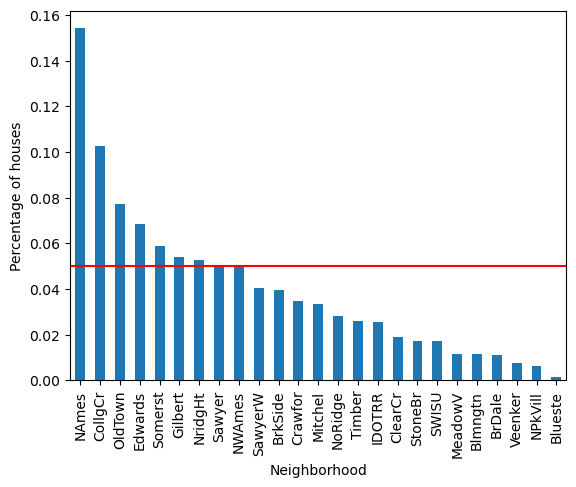

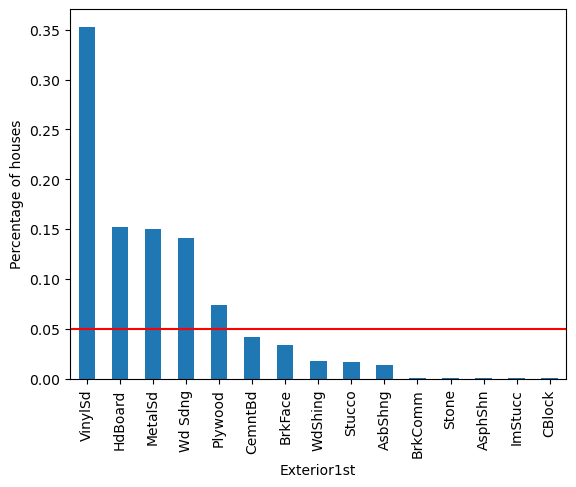

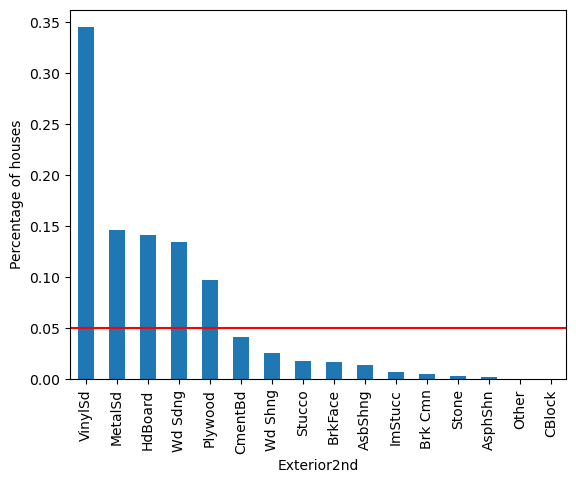

In [43]:
# Let's plot the category frequency.


total_houses = len(data)

# For each categorical variable
for col in cat_cols:

    # Count the number of houses per category
    # and divide by total houses.

    # That is, the percentage of houses per category.

    temp_df = pd.Series(data[col].value_counts() / total_houses)

    # Make plot with these percentages.
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # Add a line at 5 % to flag the threshold for rare categories.
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

Some labels appear in more than 10% of the houses and many appear in less than 10% or even 5% of the houses. These are infrequent labels or Rare Values and could cause over-fitting.

## Mean Sale Price in rare labels

In [44]:
def calculate_mean_target_per_category(df, var):

    # total number of houses
    total_houses = len(df)

    # percentage of houses per category
    temp_df = pd.Series(df[var].value_counts() / total_houses).reset_index()
    temp_df.columns = [var, 'perc_houses']

    # add the mean SalePrice
    temp_df = temp_df.merge(df.groupby([var])['SalePrice'].mean().reset_index(),
                            on=var,
                            how='left')

    return temp_df

In [45]:
temp_df = calculate_mean_target_per_category(data, 'Neighborhood')  # Use the function for the variable 'Neighborhood'

temp_df

,Neighborhood,perc_houses,SalePrice
0,NAmes,0.154110,145847.080000
1,CollgCr,0.102740,197965.773333
2,OldTown,0.077397,128225.300885
3,Edwards,0.068493,128219.700000
4,Somerst,0.058904,225379.837209
5,Gilbert,0.054110,192854.506329
6,NridgHt,0.052740,316270.623377
7,Sawyer,0.050685,136793.135135
8,NWAmes,0.050000,189050.068493
9,SawyerW,0.040411,186555.796610


The dataframe contains the percentage of houses that display each label in Neighborhood, and their mean SalePrice. For example, ~15% of houses are in "NAmes" and their mean SalePrice is 145847.

In [46]:
def plot_categories(df, var):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["SalePrice"], color='green', label='Seconds')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.show()

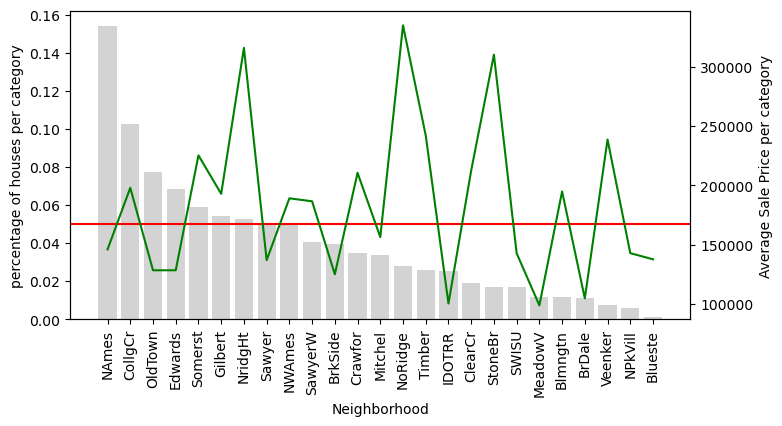

In [47]:
plot_categories(temp_df, 'Neighborhood')

Houses in 'NridgHt' sell at a high price, whereas houses in 'Sawyer' tend to be cheaper.

Houses in StoneBr have on average a high SalePrice, above 300k. However, less than 5% of houses are from StoneBr.

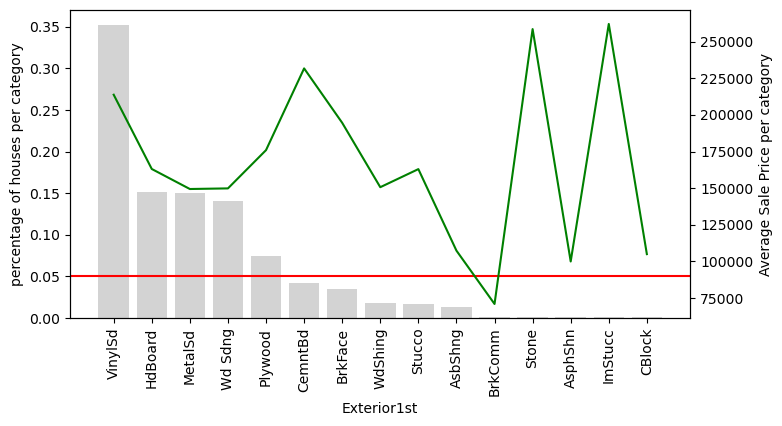

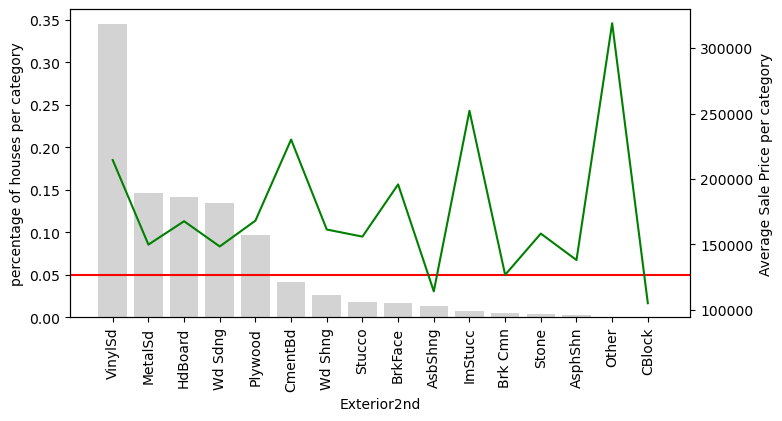

In [48]:
# Let's plot the remaining categorical variables.

for col in cat_cols:
    
    
    if col !='Neighborhood':
        
        # Re-using the functions I created.
        temp_df = calculate_mean_target_per_category(data, col)
        plot_categories(temp_df, col)

Most of the categories in the variable "Exterior2nd" are present in less than 5% of houses. In addition, the "sale price" varies a lot across those rare categories. These rare labels could indeed be very predictive, or they could be introducing noise rather than information. And because the labels are under-represented, we can't be sure whether they have a true impact on the house price. Because we only have information for a few houses, we may be underestimating or overestimating their impact.

### Grouping rare labels
A common way of handling rare values is to group them under an umbrella category called 'Rare' or 'Other'

In [49]:
def group_rare_labels(df, var):

    total_houses = len(df)

    # First,calculate the % of houses per category.
    temp_df = pd.Series(df[var].value_counts() / total_houses)

    # Then,create a dictionary to replace the rare labels with the
    # string 'rare' (for categories present in less than 5% of houses).

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.05].index else k)
        for k in temp_df.index
    }

    # Now, replace the rare categories.
    tmp = df[var].map(grouping_dict)

    return tmp

In [50]:
# Group rare labels in Neighborhood.

data['Neighborhood_grouped'] = group_rare_labels(data, 'Neighborhood')

data[['Neighborhood', 'Neighborhood_grouped']].head(10)

,Neighborhood,Neighborhood_grouped
0,CollgCr,CollgCr
1,Veenker,rare
2,CollgCr,CollgCr
3,Crawfor,rare
4,NoRidge,rare
5,Mitchel,rare
6,Somerst,Somerst
7,NWAmes,NWAmes
8,OldTown,OldTown
9,BrkSide,rare


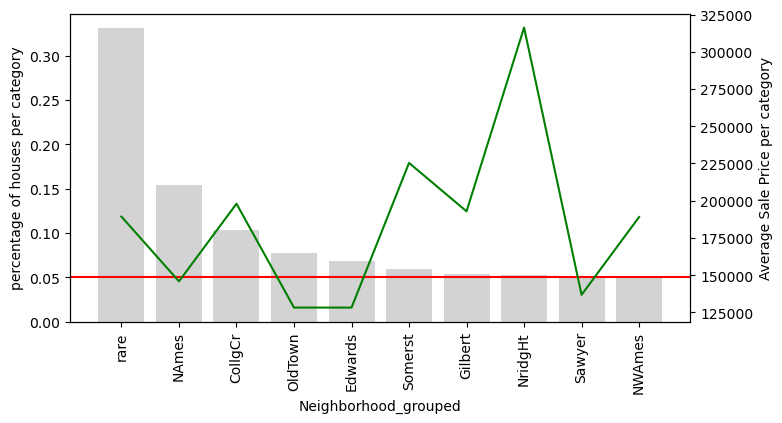

In [51]:
# Let's plot Neighborhood with the grouped categories.

temp_df = calculate_mean_target_per_category(data, 'Neighborhood_grouped')
plot_categories(temp_df, 'Neighborhood_grouped')

"Rare" now contains the overall influence of all the infrequent categories on the Sale price.

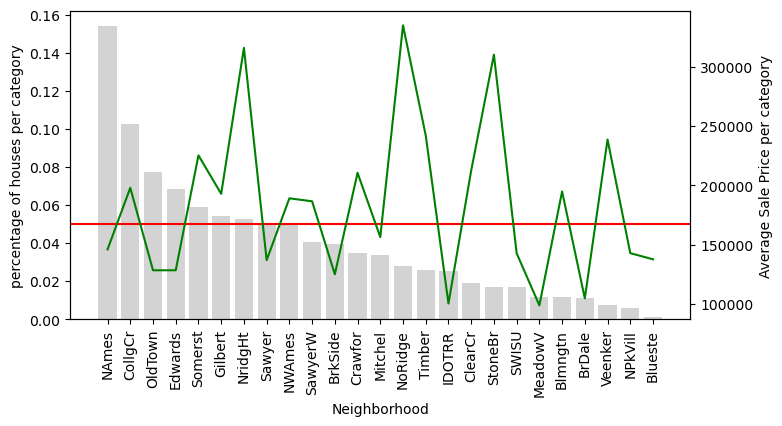

In [52]:
# plot the original Neighborhood for comparison.

temp_df = calculate_mean_target_per_category(data, 'Neighborhood')
plot_categories(temp_df, 'Neighborhood')

Only 9 categories of Neighborhood are relatively common in the dataset. The remaining ones are now grouped into 'rare' which captures the average sale price for all the infrequent labels.

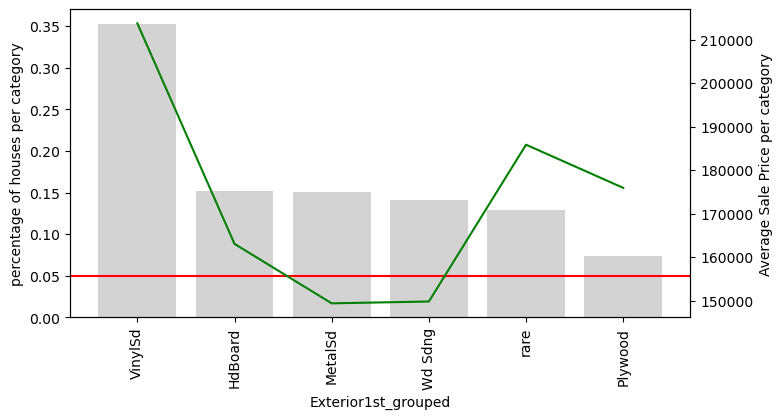

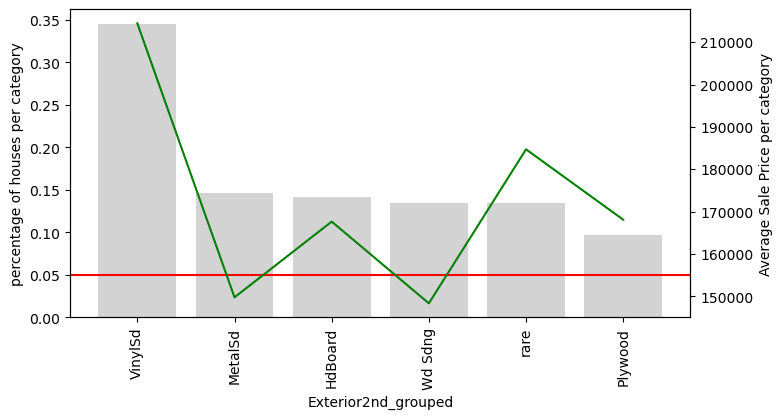

In [53]:
# Group and plot the remaining categorical variables.

for col in cat_cols[1:]:
        
    # Re-using the functions I created.
    data[col+'_grouped'] = group_rare_labels(data, col)
    temp_df = calculate_mean_target_per_category(data, col+'_grouped')
    plot_categories(temp_df, col+'_grouped')

**Note:** `In the variable Exterior1st, houses with rare values are on average more expensive (except for those with VinySd). The same is true for Exterior2nd. The rare categories seem to have something in common.`

### Uneven distribution between train and test sets

Similarly to highly cardinal variables, rare labels often appear only on the training set or only on the testing set. If only in the training set, they may lead to over-fitting. If only in the testing set, machine learning models will not know how to handle them because they were not seen during training.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data[cat_cols],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=2910)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [55]:
# Let's find labels present only in the training set.

unique_to_train_set = [
    x for x in X_train['Exterior1st'].unique() if x not in X_test['Exterior1st'].unique()
]

print(unique_to_train_set)

['Stone', 'BrkComm', 'ImStucc', 'CBlock']


There are 4 categories present only in the train.

In [56]:
# Let's find labels present only in the test set.

unique_to_test_set = [
    x for x in X_test['Exterior1st'].unique() if x not in X_train['Exterior1st'].unique()
]

print(unique_to_test_set)

['AsphShn']


In this case, there is 1 rare value present in the test set only.